<a href="https://colab.research.google.com/github/baldan555/capstone/blob/main/TireBinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset_path = ("/content/drive/MyDrive/CAPSTONE BANGKIT PROJECT BISMILLAH//256/train")
validation_dataset_path = ("/content/drive/MyDrive/CAPSTONE BANGKIT PROJECT BISMILLAH/256/test")

In [108]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 32

In [109]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.28,
                                  shear_range=0.3,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size= (IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   color_mode ='rgb',
                                                   class_mode='binary',
                                                   shuffle=True)

Found 157 images belonging to 2 classes.


In [110]:
validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                        )
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             color_mode ='rgb',
                                                             class_mode='binary',
                                                             shuffle=True)

Found 34 images belonging to 2 classes.


In [111]:
model = Sequential([

tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [112]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,
                 decay = 1e-4,
                 beta_1=0.8,
                 beta_2=0.999,
                 amsgrad=True)

In [113]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
history = model.fit(train_generator, epochs=60, validation_data=validation_generator,
                       verbose=2,
                       )

Epoch 1/60
5/5 - 4s - loss: 0.9108 - accuracy: 0.5096 - val_loss: 0.6879 - val_accuracy: 0.5000 - 4s/epoch - 804ms/step
Epoch 2/60
5/5 - 3s - loss: 0.6901 - accuracy: 0.4968 - val_loss: 0.6812 - val_accuracy: 0.7059 - 3s/epoch - 550ms/step
Epoch 3/60
5/5 - 3s - loss: 0.6733 - accuracy: 0.6624 - val_loss: 0.6976 - val_accuracy: 0.5000 - 3s/epoch - 557ms/step
Epoch 4/60
5/5 - 4s - loss: 0.6286 - accuracy: 0.6051 - val_loss: 0.6166 - val_accuracy: 0.6176 - 4s/epoch - 737ms/step
Epoch 5/60
5/5 - 3s - loss: 0.5884 - accuracy: 0.6688 - val_loss: 0.5982 - val_accuracy: 0.7059 - 3s/epoch - 566ms/step
Epoch 6/60
5/5 - 3s - loss: 0.6268 - accuracy: 0.6561 - val_loss: 0.5394 - val_accuracy: 0.7059 - 3s/epoch - 559ms/step
Epoch 7/60
5/5 - 4s - loss: 0.4905 - accuracy: 0.7707 - val_loss: 0.5043 - val_accuracy: 0.7647 - 4s/epoch - 807ms/step
Epoch 8/60
5/5 - 3s - loss: 0.4852 - accuracy: 0.7389 - val_loss: 0.4507 - val_accuracy: 0.7941 - 3s/epoch - 598ms/step
Epoch 9/60
5/5 - 3s - loss: 0.4403 - acc

In [115]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']



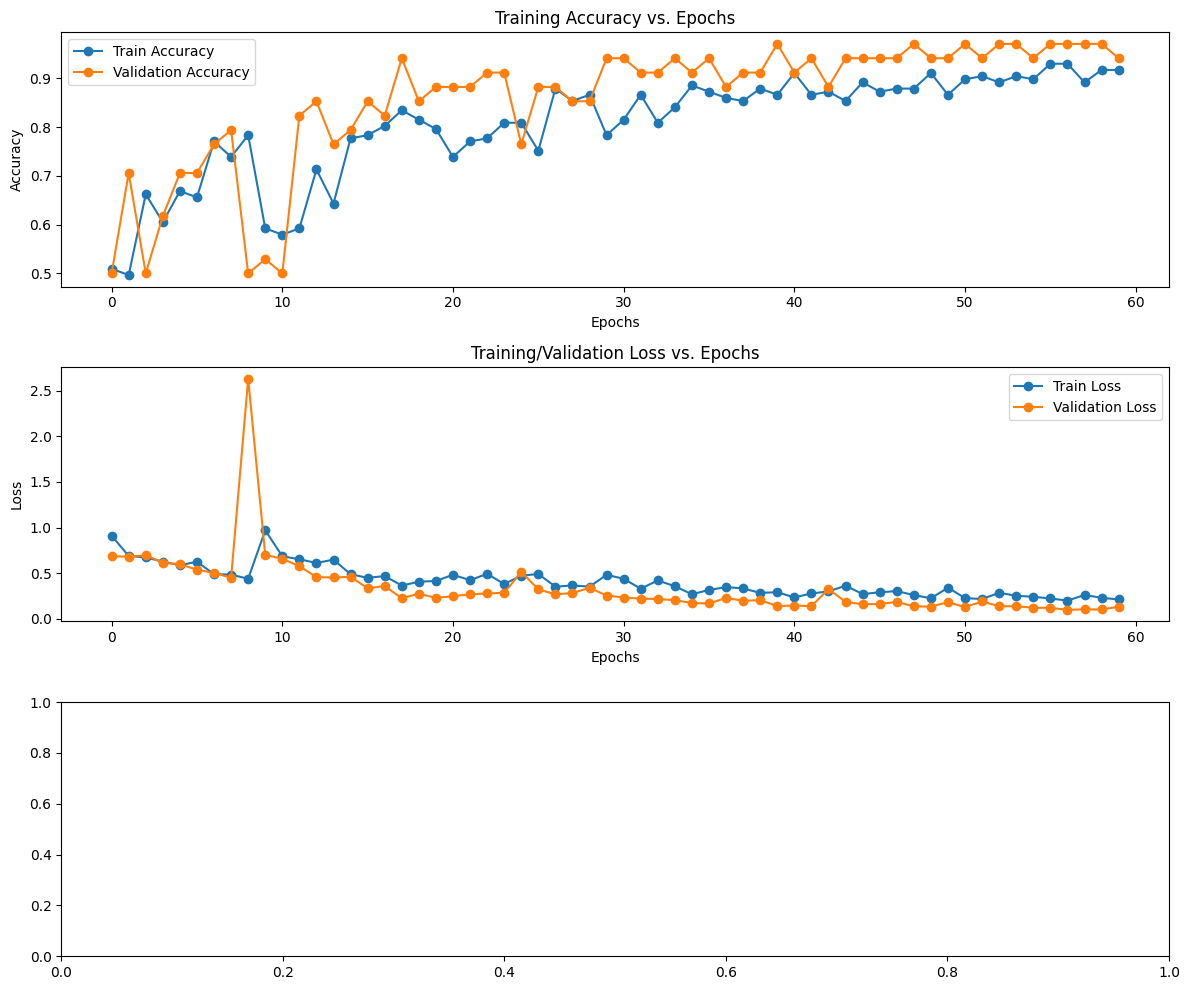

In [116]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

In [128]:
test_dataset_path = ("/content/drive/MyDrive/CAPSTONE BANGKIT PROJECT BISMILLAH/256/test")

In [129]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='binary')

Found 34 images belonging to 2 classes.


In [131]:
predictions = model.predict(test_generator)

2/2 [==============================] - 0s 12ms/step


In [133]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : kualitas bagus
1 : kualitas buruk


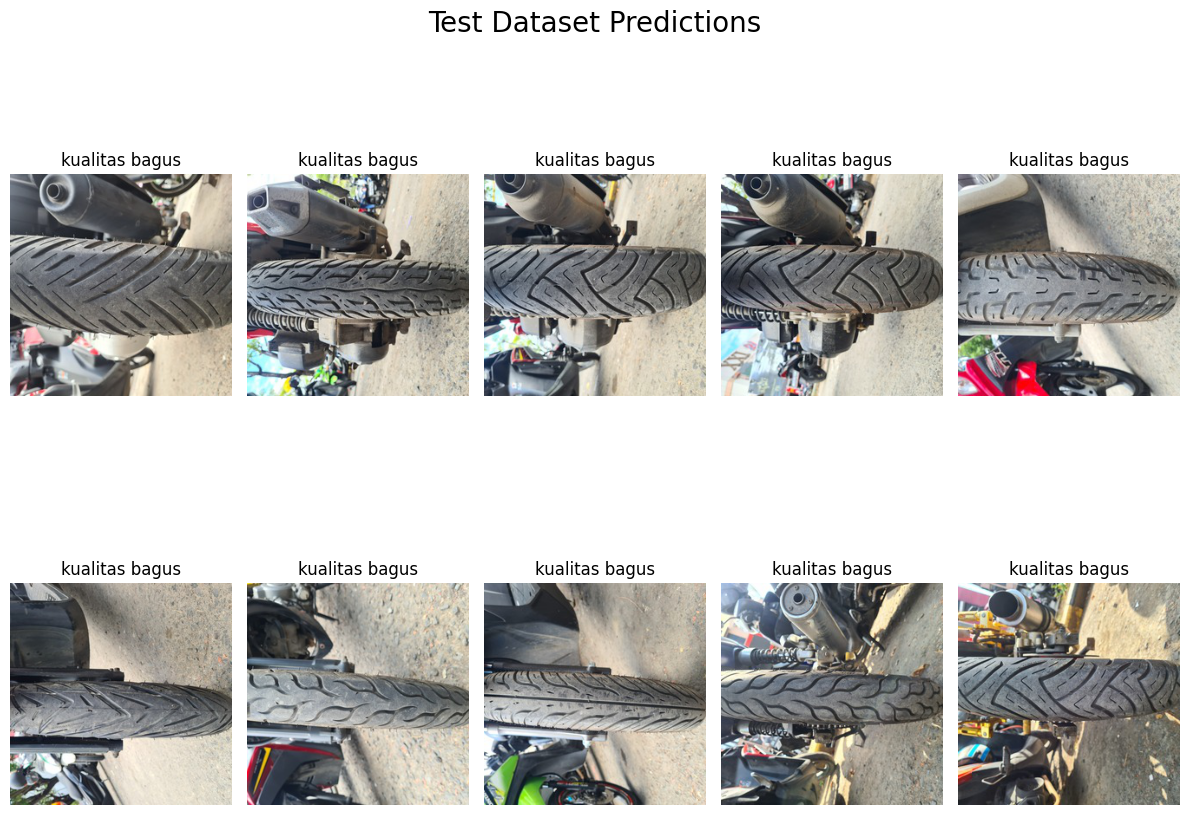

In [134]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [136]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

2/2 [==============================] - 1s 23ms/step - loss: 0.1344 - accuracy: 0.9412


Saving 20230603_142829.jpg to 20230603_142829.jpg
1/1 [==============================] - 0s 26ms/step
20230603_142829.jpg
Kualitas buruk


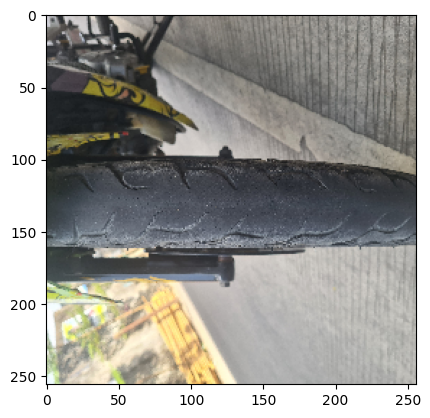

In [159]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(fn)
    if classes[0, 0] == 1.0:
        print('Kualitas buruk')
    else:
        print('Kualitas baik')
